In [6]:
from model import MT1QL
from dataloader import MTurk1BehaviorData
from runner import ExperimentManager
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch.multiprocessing import spawn

In [2]:
jeeves_probe_data = MTurk1BehaviorData('./data_files/fixed_jeeves_probe_all.csv', dev='cuda', dataset_name='jeeves_probe')
wooster_probe_data = MTurk1BehaviorData('./data_files/fixed_wooster_probe_all.csv', dev='cuda', dataset_name='wooster_probe')
jacamo_probe_data = MTurk1BehaviorData('./data_files/fixed_jocamo_probe_all.csv', dev='cuda', dataset_name='jocamo_probe')

In [3]:
probe_task = ExperimentManager(name='probe_no_gauss',
                                   datasets=[jeeves_probe_data, wooster_probe_data, jacamo_probe_data],
                                   save_dirs=['./models/jeeves_probe/', './models/wooster_probe/', './models/jocamo_probe/'])

In [ ]:
probe_task.fit(1500)

**********
 jeeves_probe EPOCH 0
liklihood tensor([0.5118], device='cuda:0', grad_fn=<DivBackward0>) 
learning rates Parameter containing:
tensor([0.0094, 0.0112, 0.0085, 0.0102, 0.0115], device='cuda:0',
       requires_grad=True) 
temperatures Parameter containing:
tensor([2.1457, 1.8185, 2.1890, 1.6406, 2.6455], device='cuda:0',
       requires_grad=True) 
**********
**********
 wooster_probe EPOCH 0
liklihood tensor([0.5403], device='cuda:0', grad_fn=<DivBackward0>) 
learning rates Parameter containing:
tensor([0.0082, 0.0073, 0.0096, 0.0070, 0.0087], device='cuda:0',
       requires_grad=True) 
temperatures Parameter containing:
tensor([2.0221, 2.3479, 2.1940, 2.2261, 2.0219], device='cuda:0',
       requires_grad=True) 
**********
**********
 jocamo_probe EPOCH 0
liklihood tensor([0.5324], device='cuda:0', grad_fn=<DivBackward0>) 
learning rates Parameter containing:
tensor([0.0108, 0.0082, 0.0112, 0.0073, 0.0083], device='cuda:0',
       requires_grad=True) 
temperatures Paramet

Process SpawnPoolWorker-43:
Traceback (most recent call last):
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Process SpawnPoolWorker-46:
Traceback (most recent call last):
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/

**********
 jeeves_probe EPOCH 984
**********
 jocamo_probe EPOCH 915
**********
 wooster_probe EPOCH 955


/home/ssbeast/Projects/SS/MT1RL/model.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
Process SpawnPoolWorker-1:
Traceback (most recent call last):
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/ssbeast/anaconda3/envs/ssfmri/lib/python3.8/multiprocessing/pool.py", line 51, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/home/ssbeast/Projects/SS/MT1RL/runner.py", line 14, in _fit_wrapper
    model.fit(dataset, epochs)
  File "/home/ssbeast/Projects/SS

In [4]:
probe_task.load('snapshot910.pkl')

/home/ssbeast/Projects/SS/MT1RL/model.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
/home/ssbeast/Projects/SS/MT1RL/model.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(choice_made_probs)
/home/ssbeast/Projects/SS/MT1RL/model.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  choice_probs = self.softmax(temp * option_exp)
/home/ssbeast/Projects/SS/MT1RL/model.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depreca

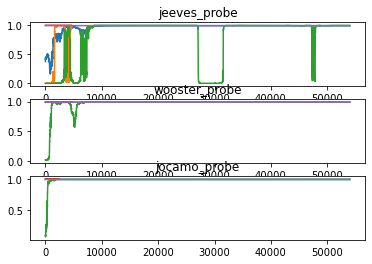

In [5]:
data = probe_task.plot_learning_curves()

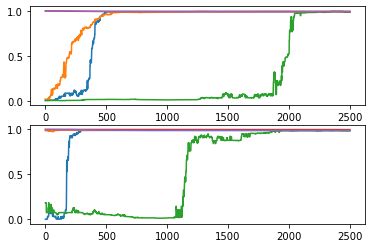

In [10]:
models_to_plot = (1, 2)
from scipy.ndimage import median_filter
fig, axs = plt.subplots((len(models_to_plot)))
for i, m in enumerate(models_to_plot):
    for trial_type in data[m]:
        smoothed = median_filter(trial_type, 500)
        axs[i].plot(smoothed[0:2500])

In [12]:
np_q = probe_task.models[2].q_init.detach().cpu().numpy()

In [ ]:
np_q = probe_task.models[1].q_init.detach().cpu().numpy()